In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df.csv")

In [3]:
all_match = df.drop("Participants",axis = 1).columns

In [4]:
def compute_winner(x):
    if(len(x)<4):
        if((int(x[0]) - int(x[2])) > 0):
            return "Domicile"
        elif((int(x[0]) - int(x[2])) == 0):
            return "Nul"
        else:
            return "Exterieur"
    else:
        return "Pas joué"

In [5]:
#df = df.query("Participants == 'Gilles' or Participants == 'Lisa'")

In [6]:
for match in all_match:
    r = match + " winner"
    df[r] = df[match].apply(lambda x : compute_winner(x))

In [7]:
df

,Participants,France - Espagne,Angleterre - Hollande,France - Espagne winner,Angleterre - Hollande winner
0,Gilles,2-1,2-1,Domicile,Domicile
1,Gilles,1-0,1-0,Domicile,Domicile
2,Gilles,3-1,3-1,Domicile,Domicile
3,Lisa,1-0,1-0,Domicile,Domicile
4,Lisa,2-0,0-1,Domicile,Exterieur
...,...,...,...,...,...
61,Serge,0-0,1-2,Nul,Exterieur
62,Serge,2-1,1-1,Domicile,Nul
63,Claude,2-0,1-2,Domicile,Exterieur
64,Claude,3-1,1-3,Domicile,Exterieur


# Compute score

In [8]:
for match in all_match:
    b = match + " score_final"
    df[b] = "Pas joué"

In [9]:
all_match

Index(['France - Espagne', 'Angleterre - Hollande'], dtype='object')

In [10]:
df["France - Espagne score_final"] = "1-2"
#df["Angleterre - Hollande score_final"] = "0-0"


In [11]:
# Function to calculate points
def calculate_points(predicted, actual):
    pred_scores = predicted.split('-')
    actual_scores = actual.split('-')
    if len(pred_scores)>1:
        # Check if either team score matches
        if pred_scores[0] == actual_scores[0] or pred_scores[1] == actual_scores[1]:
            return 2
        else:
            return 0

# Apply the function to the DataFrame


In [12]:
for match in all_match:
    s = match + " points"
    a = match + " real winner"
    int_ = match + " basic"
    nou = match + " nouveau"
    score = match + " score_final"
    df[a] = df[score].apply(lambda x : compute_winner(x))
    df[s] = np.where(df[match +" score_final"] == df[match], 3, 0)
    df[nou] = df.apply(lambda row: calculate_points(row[match +" score_final"], row[match]), axis=1)
    df[int_] = np.where(df[match+" winner"] == df[a], 1, 0)
    df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
    df[nou] = df.apply(lambda row: 0 if row[int_] != 1 else row[nou], axis=1)
    df[int_] = df.apply(lambda row: 0 if row[nou] == 2 else row[int_], axis=1)
    df[s] = df[s]+df[int_]+ df[nou]
    df.drop(int_ , axis = 1, inplace = True)

In [13]:
score_columns = [col for col in df.columns if col.endswith('points')]
df['total_score'] = df[score_columns].sum(axis=1)

# Affichage

In [14]:
df.columns

Index(['Participants', 'France - Espagne', 'Angleterre - Hollande',
       'France - Espagne winner', 'Angleterre - Hollande winner',
       'France - Espagne score_final', 'Angleterre - Hollande score_final',
       'France - Espagne real winner', 'France - Espagne points',
       'France - Espagne nouveau', 'Angleterre - Hollande real winner',
       'Angleterre - Hollande points', 'Angleterre - Hollande nouveau',
       'total_score'],
      dtype='object')

In [15]:
df[['Participants', 'France - Espagne', 'Angleterre - Hollande','France - Espagne points','Angleterre - Hollande points',
       'total_score']].sort_values("total_score",ascending=False)

,Participants,France - Espagne,Angleterre - Hollande,France - Espagne points,Angleterre - Hollande points,total_score
52,Dom,1-2,1-2,3,0,3
39,Jeremy,1-2,2-1,3,0,3
18,Irwin,1-2,0-1,3,0,3
36,Patrice,1-3,0-0,2,0,2
26,Brice,0-1,1-0,1,0,1
...,...,...,...,...,...,...
28,Pascal,2-1,0-1,0,0,0
29,Pascal,1-1,1-0,0,0,0
30,Cedric,2-0,0-0,0,0,0
31,Cedric,3-0,0-0,0,0,0


In [16]:
affichage = ['Participants', 'France - Espagne', 'Angleterre - Hollande', "total_score"]
df[affichage]

,Participants,France - Espagne,Angleterre - Hollande,total_score
0,Gilles,2-1,2-1,0
1,Gilles,1-0,1-0,0
2,Gilles,3-1,3-1,0
3,Lisa,1-0,1-0,0
4,Lisa,2-0,0-1,0
...,...,...,...,...
61,Serge,0-0,1-2,0
62,Serge,2-1,1-1,0
63,Claude,2-0,1-2,0
64,Claude,3-1,1-3,0


In [17]:
test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))

In [18]:
test

,total_score
Participants,
Irwin,3
Dom,3
Jeremy,3
Patrice,2
Brice,1
Jean-Pierre,0
Pierrot,0
Pascal,0
Lisa,0


In [19]:
df[affichage].sort_values("total_score", ascending = False)

,Participants,France - Espagne,Angleterre - Hollande,total_score
52,Dom,1-2,1-2,3
39,Jeremy,1-2,2-1,3
18,Irwin,1-2,0-1,3
36,Patrice,1-3,0-0,2
26,Brice,0-1,1-0,1
...,...,...,...,...
28,Pascal,2-1,0-1,0
29,Pascal,1-1,1-0,0
30,Cedric,2-0,0-0,0
31,Cedric,3-0,0-0,0


# Score en direct

In [20]:
test.reset_index(inplace = True)

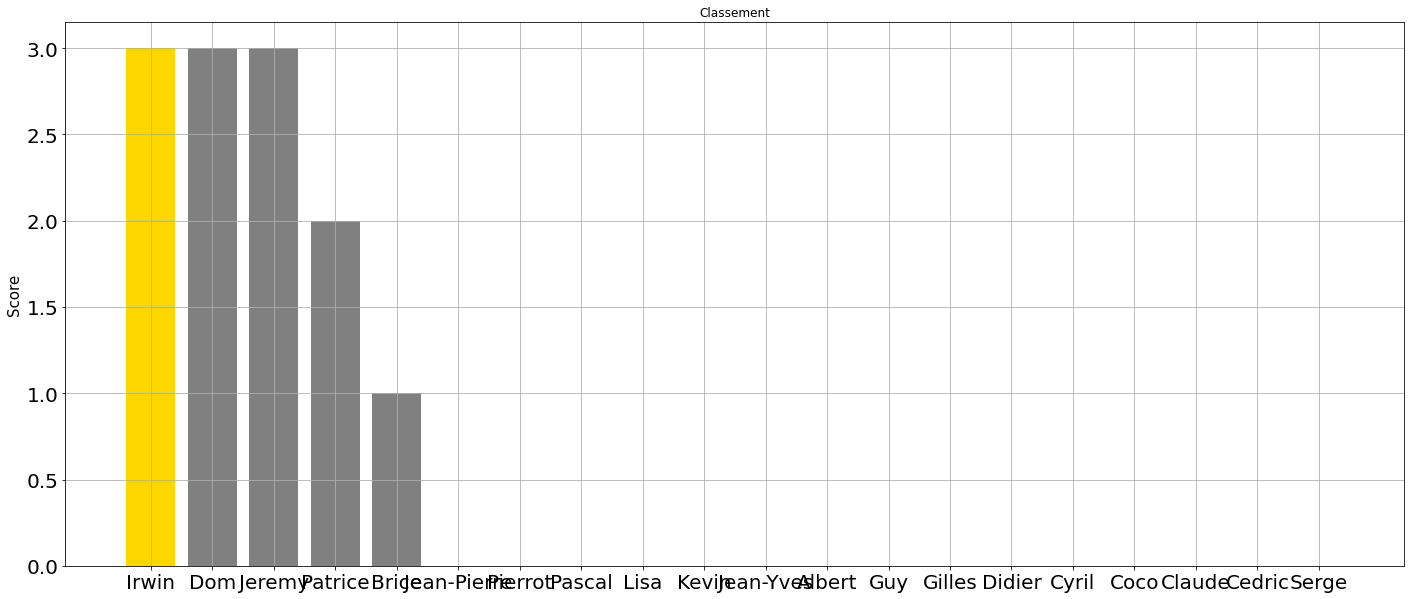

In [21]:
plt.figure(figsize=(24, 10))
plt.bar(test["Participants"],test["total_score"], color=['gold', 'grey', 'grey', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"])

plt.ylabel('Score',fontsize=15)
plt.title('Classement')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.savefig('classement.png')
plt.show()

plt.close()

# Live

Match 1 details not available.
Match 2 details not available.
Live score: N/A N/A - N/A N/A , N/A N/A - N/A N/A


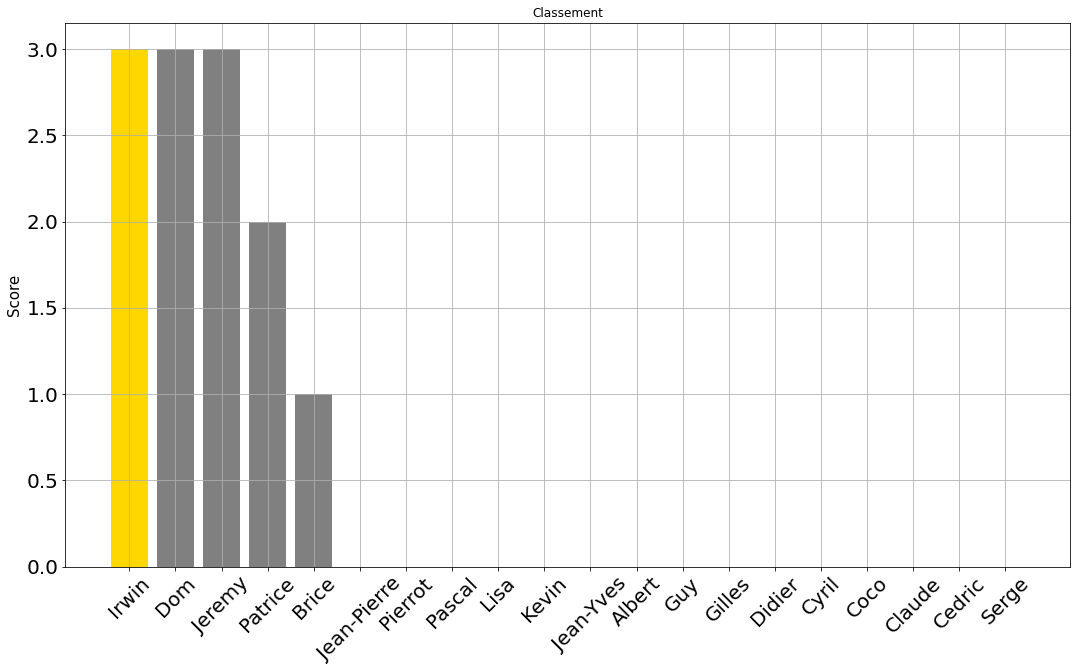

In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
import time
import subprocess
from IPython.display import clear_output
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


while True:
    # Your code here
    print("This cell will re-run every 4 minutes")
    clear_output(wait=True)
    
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

    # Match 1
    driver1 = webdriver.Chrome(options=chrome_options)
    driver1.get("https://www.livescore.in/fr/match/0dMzsHxJ/#/resume-du-match/resume-du-match")

    # Match 2
    driver2 = webdriver.Chrome(options=chrome_options)
    driver2.get("https://www.livescore.in/fr/match/naiVz03c/#/resume-du-match")

    try:
        # Initialize variables
        home_team1, domicile1, exterieur1, ext_team1 = None, None, None, None
        home_team2, domicile2, exterieur2, ext_team2 = None, None, None, None

        # Match 1
        try:
            container1 = WebDriverWait(driver1, 10).until(
                EC.presence_of_element_located((By.ID, "detail"))
            )
            domicile1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
            exterieur1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
            home_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            ext_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            
            print(domicile1.text)
            print(exterieur1.text)
            print(home_team1.text)
            print(ext_team1.text)
        except (NoSuchElementException, TimeoutException):
            print("Match 1 details not available.")
        
        # Match 2
        try:
            container2 = WebDriverWait(driver2, 10).until(
                EC.presence_of_element_located((By.ID, "detail"))
            )
            domicile2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
            exterieur2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
            home_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            ext_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            
            print(domicile2.text)
            print(exterieur2.text)
            print(home_team2.text)
            print(ext_team2.text)
        except (NoSuchElementException, TimeoutException):
            print("Match 2 details not available.")

        # Text
        live_score_text = (
            f"Live score: {home_team1.text if home_team1 else 'N/A'} {domicile1.text if domicile1 else 'N/A'} - "
            f"{exterieur1.text if exterieur1 else 'N/A'} {ext_team1.text if ext_team1 else 'N/A'} , "
            f"{home_team2.text if home_team2 else 'N/A'} {domicile2.text if domicile2 else 'N/A'} - "
            f"{exterieur2.text if exterieur2 else 'N/A'} {ext_team2.text if ext_team2 else 'N/A'}"
        )
        print(live_score_text)

        with open('live_score.html', 'w') as f:
            f.write(f"<p>{live_score_text}</p>")

        # Match 1 DataFrame update
        if domicile1 and exterieur1:
            df['Angl - Suisse score_final'] = str(domicile1.text) + "-" + str(exterieur1.text)
            s = "Angl - Suisse points"
            a = "Angl - Suisse real winner"
            nou = "Angl - Suisse nouveau"
            int_ = "Angl - Suisse basic"
            score = "Angl - Suisse score_final"
            df[a] = df[score].apply(lambda x: compute_winner(x))
            df[s] = np.where(df["Angl - Suisse score_final"] == df['Angl - Suisse'], 3, 0)
            df[int_] = np.where(df["Angl - Suisse winner"] == df[a], 1, 0)
            df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
            df[nou] = df.apply(lambda row: 0 if row[int_] != 1 else row[nou], axis=1)
            df[int_] = df.apply(lambda row: 0 if row[nou] == 2 else row[int_], axis=1)
            df[s] = df[s]+df[int_]+ df[nou]
            df.drop(int_, axis=1, inplace=True)
        
        # Match 2 DataFrame update
        if domicile2 and exterieur2:
            df['Holl - Turquie score_final'] = str(domicile2.text) + "-" + str(exterieur2.text)
            s = "Holl - Turquie points"
            a = "Holl - Turquie real winner"
            nou = "Holl - Turquie nouveau"
            int_ = "Holl - Turquie basic"
            score = "Holl - Turquie score_final"
            df[a] = df[score].apply(lambda x: compute_winner(x))
            df[s] = np.where(df["Holl - Turquie score_final"] == df['Holl - Turquie'], 3, 0)
            df[int_] = np.where(df["Holl - Turquie winner"] == df[a], 1, 0)
            df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
            df[nou] = df.apply(lambda row: 0 if row[int_] != 1 else row[nou], axis=1)
            df[int_] = df.apply(lambda row: 0 if row[nou] == 2 else row[int_], axis=1)
            df[s] = df[s]+df[int_]+ df[nou]
            df[s] = df[s] + df[int_]
            df.drop(int_, axis=1, inplace=True)
        
        # Score
        score_columns = [col for col in df.columns if col.endswith('points')]
        df['total_score'] = df[score_columns].sum(axis=1)
        test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))
        test.reset_index(inplace=True)
        affichage_2 = df[affichage].sort_values("total_score", ascending=False)
        affichage_2.to_html('classement_table.html', index=False)
        
        plt.figure(figsize=(18, 10))
        plt.bar(test["Participants"], test["total_score"], color=['gold', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"] * 11)
        plt.ylabel('Score', fontsize=15)
        plt.title('Classement')
        plt.xticks(fontsize=20, rotation=45)
        plt.yticks(fontsize=20)
        plt.grid(True)
        plt.savefig('classement.png')
        plt.show()
        plt.close()

        status_output = subprocess.run(['git', 'status', '--porcelain'], capture_output=True, text=True).stdout.strip()

        if status_output:
            subprocess.run(['git', 'add', 'classement.png', 'index.html', 'classement_table.html', "test2.ipynb", "index.html", "live_score.html"], check=True)
            subprocess.run(['git', 'commit', '-m', 'Update classement plot'], check=True)
            subprocess.run(['git', 'push'], check=True)
    finally:
        driver1.quit()
        #driver2.quit()
    
    # Sleep for 4 minutes (4 minutes * 60 seconds)
    time.sleep(4 * 60)
